In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random

dir='images'
data=[]
categories = ['pappaya','tomato']

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)

    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        fruit_img=cv2.imread(imgpath,0)
        try:
            fruit_img=cv2.resize(fruit_img,(50,50))
            image=np.array(fruit_img).flatten()

            data.append([image,label])
        except Exception as e:
            pass

print(len(data))
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()
        

400


In [8]:
pick_in=open('data1.pickle','rb')
pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
print(features)
print(labels)


[array([ 60,  54,  55, ...,  57,  88, 107], dtype=uint8), array([90, 85, 98, ..., 54, 55, 81], dtype=uint8), array([142, 140, 141, ..., 200, 201, 199], dtype=uint8), array([55, 54, 76, ..., 54, 56, 55], dtype=uint8), array([111, 109, 104, ..., 139, 173, 151], dtype=uint8), array([143, 144, 142, ..., 204, 204, 202], dtype=uint8), array([194, 193, 194, ..., 141, 141, 138], dtype=uint8), array([52, 49, 52, ..., 50, 49, 45], dtype=uint8), array([141, 154, 159, ..., 237, 243, 248], dtype=uint8), array([ 30,  30,  27, ..., 150, 108, 183], dtype=uint8), array([187, 190, 188, ..., 160, 160, 159], dtype=uint8), array([188, 190, 190, ..., 189, 188, 183], dtype=uint8), array([59, 73, 60, ..., 59, 61, 61], dtype=uint8), array([109, 103,  99, ...,  65,  67,  71], dtype=uint8), array([158,  81,  79, ...,  74,  82,  77], dtype=uint8), array([187, 188, 187, ..., 153, 158, 158], dtype=uint8), array([50, 53, 54, ..., 90, 87, 89], dtype=uint8), array([ 64,  71,  68, ..., 243, 247, 250], dtype=uint8), arr

Accuracy:  1.0


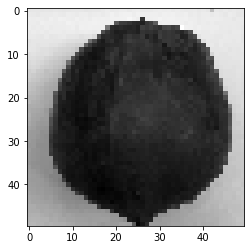

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size= 0.25)

model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(xtrain, ytrain)
prediction=model.predict(xtest)
accuracy = model.score(xtest,ytest)
print('Accuracy: ', accuracy)

myfruit=xtest[0].reshape(50,50)
plt.imshow(myfruit,cmap='gray')
plt.show()